In [2]:
from data_storage import create_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport

In [3]:
connection = create_connection("../database/crypto_billionairs.db")

In [3]:
df_btc = pd.read_sql_query("select * from BTC_1min_complete_raw", connection)
df_btc["time"] = pd.to_datetime(df_btc['time'])
df_btc = df_btc.set_index('time')      
df_btc = df_btc.resample('1T').mean()
df_btc["close"].isna().sum()

756761

In [4]:
df_eth = pd.read_sql_query("select * from ETH_1min_complete_raw", connection)
df_eth["time"] = pd.to_datetime(df_eth['time'])
df_eth = df_eth.set_index('time')      
df_eth = df_eth.resample('1T').mean()
df_eth["close"].isna().sum()

437067

In [6]:
df_ltc = pd.read_sql_query("select * from LTC_1min_complete_raw", connection)
df_ltc["time"] = pd.to_datetime(df_ltc['time'])
df_ltc = df_ltc.set_index('time')      
df_ltc = df_ltc.resample('1T').mean()
df_ltc["close"].isna().sum()

112162

In [7]:
df_doge = pd.read_sql_query("select * from DOGE_1min_complete_raw", connection)
df_doge["time"] = pd.to_datetime(df_doge['time'])
df_doge = df_doge.set_index('time')      
df_doge = df_doge.resample('1T').mean()
df_doge["close"].isna().sum()

598008

In [4]:
df_btc = pd.read_sql_query("select * from BTC_1min_complete_1day_preprocessed_1day_features", connection)
df_eth = pd.read_sql_query("select * from ETH_1min_complete_1day_preprocessed_1day_features", connection)
df_ltc = pd.read_sql_query("select * from LTC_1min_complete_1day_preprocessed_1day_features", connection)
df_doge = pd.read_sql_query("select * from DOGE_1min_complete_1day_preprocessed_1day_features", connection)
df_pool = pd.read_sql_query("select * from cryptocurrency_pooling_dataset", connection)

In [21]:
df_btc_last_year = df_btc[-365:]
df_eth_last_year = df_eth[-365:]
df_ltc_last_year = df_ltc[-365:]
df_doge_last_year = df_doge[-365:]

In [9]:
prof = ProfileReport(df_btc)
prof.to_file(output_file='data_profile_BTC.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]


In [10]:
prof = ProfileReport(df_eth)
prof.to_file(output_file='data_profile_ETH.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


In [11]:
prof = ProfileReport(df_ltc)
prof.to_file(output_file='data_profile_LTC.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


In [7]:
prof = ProfileReport(df_doge)
prof.to_file(output_file='data_profile_DOGE.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]


In [6]:
prof = ProfileReport(df_pool)
prof.to_file(output_file='data_profile_POOL.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


In [55]:
df = pd.DataFrame()
df["btc_close"] = df_btc_last_year["close"].tolist()
df["eth_close"] = df_eth_last_year["close"].tolist()
df["ltc_close"] = df_ltc_last_year["close"].tolist()
df["doge_close"] = df_doge_last_year["close"].tolist()


In [57]:
df.corr()

,btc_close,eth_close,ltc_close,doge_close
btc_close,1.000000,0.692602,0.684339,0.198240
eth_close,0.692602,1.000000,0.345435,0.212622
ltc_close,0.684339,0.345435,1.000000,0.617441
doge_close,0.198240,0.212622,0.617441,1.000000


Text(0, 0.5, 'Equity')

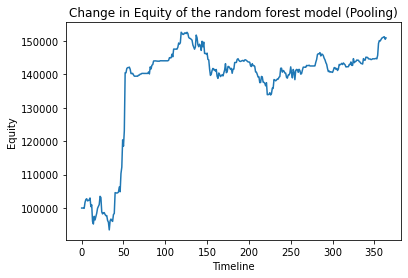

In [21]:
#shows the change of equity for the random forest pooling model
df_equity1 = pd.read_sql_query("select * from cryptocurrencies_risk_metrics_1m_abnormal_day_ml_pooling_equity", connection)
plt.plot(df_equity1.sum(axis=1) / 25)
plt.title("Change in Equity of the random forest model (Pooling)")
plt.xlabel("Timeline")
plt.ylabel("Equity") 

Text(0, 0.5, 'Equity')

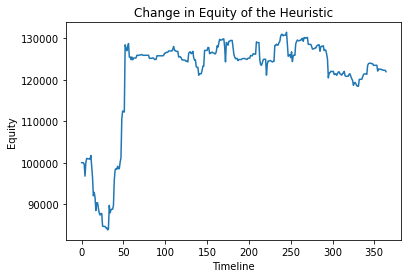

In [22]:
#shows the change of equity for the heuristic
df_equity2 = pd.read_sql_query("select * from cryptocurrencies_risk_metrics_1m_abnormal_day_equity", connection)
plt.plot(df_equity2.sum(axis=1) / 25)
plt.title("Change in Equity of the Heuristic")
plt.xlabel("Timeline")
plt.ylabel("Equity") 

Text(0, 0.5, 'Equity')

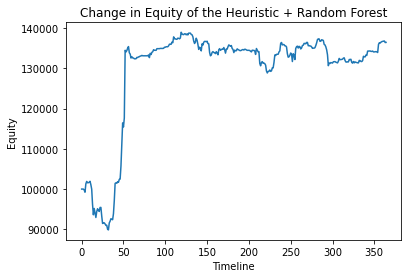

In [23]:
plt.plot((df_equity1.sum(axis=1) + df_equity2.sum(axis=1)) / 50)
plt.title("Change in Equity of the Heuristic + Random Forest")
plt.xlabel("Timeline")
plt.ylabel("Equity") 

Text(0, 0.5, 'Equity')

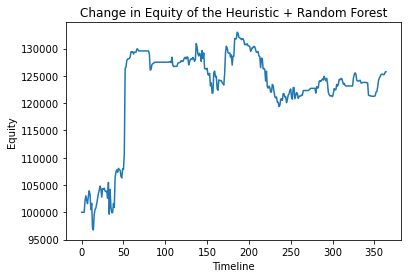

In [6]:
df_equity3 = pd.read_sql_query("select * from cryptocurrencies_risk_metrics_1m_abnormal_day_ml_pooling_reversal_equity", connection)
plt.plot(df_equity3.sum(axis=1) / 24)
plt.title("Change in Equity of the Heuristic + Random Forest")
plt.xlabel("Timeline")
plt.ylabel("Equity") 